In [362]:
import numpy as np
import pandas as pd

In [363]:
df = pd.read_csv("kc_house_data.csv") # csv파일을 불러와 DataFrame 객체로 저장
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


- 개선 방안
1. y값인 price를 우측으로 이동
2. date column의 데이터 타입을 날짜 형식으로 변환 -> linearregression은 날짜 형식 데이터 사용 불가

- 한계
1. 특성 파악 미흡(condition, grade, sqft_above, sqft_basement, sqft_living15, sqft_lot15)

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [365]:
df['date'] = pd.to_datetime(df['date']) # object 타입인 date를 float로 변경하기 위해 날짜 형식으로 변경 후
df['date_delta'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D') # 연산을 통해 float 형식으로 변경. 가장 이른 날부터 상대적인 날짜 수를 나타냄
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [366]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_delta'],
      dtype='object')

In [367]:
df = df[['id', 'date_delta', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']] # 필요 없어진 date column 정리, price column을 맨 뒤로 보냄
df.rename(columns = {"date_delta" : "date"}, inplace = True) # column 명 정리
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,164.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,221.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,299.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,221.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,292.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [369]:
X = df.loc[:, 'date':'sqft_lot15']
X

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,164.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,221.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,299.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,221.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,292.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,19.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,297.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,52.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,259.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [370]:
y = df['price']
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [371]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [372]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

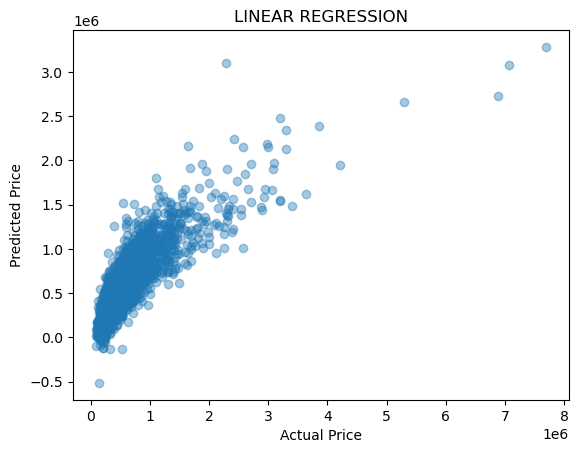

In [373]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("LINEAR REGRESSION")
plt.show()

In [374]:
reg.coef_ # grade의 가중치가 가장 높음(미치는 영향이 가장 큼)

array([ 1.13298099e+02, -3.21189856e+04,  3.63219645e+04,  1.06202988e+02,
        1.29774538e-01,  1.05799393e+04,  5.39083904e+05,  5.16848793e+04,
        2.89751789e+04,  9.61157729e+04,  6.83460930e+01,  3.78568954e+01,
       -2.51586528e+03,  2.20724752e+01, -5.48048312e+02,  6.13097703e+05,
       -2.04850725e+05,  2.15201156e+01, -3.47711527e-01])

In [375]:
reg.score(X_train, y_train)

0.7050182624005739

In [376]:
reg.score(X_test, y_test)

0.687090508567493

In [377]:
#표준화, 이상치 제거, 정규화 후 예측
#코드 출처 : https://huidea.tistory.com/39

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)


print('feature 들의 평균 값')
print(df.mean())
print('\nfeature 들의 분산 값')
print(df.var())

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(df)
df_scaled = scaler.transform(df)

print("\n=========== 표준화 ==============\n")

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df_scaled = pd.DataFrame(data=df_scaled, columns=df.columns)
print('feature 들의 평균 값')
print(df_scaled.mean())
print('\nfeature 들의 분산 값')
print(df_scaled.var())

feature 들의 평균 값
id               4.580302e+09
date             1.801931e+02
bedrooms         3.370842e+00
bathrooms        2.114757e+00
sqft_living      2.079900e+03
sqft_lot         1.510697e+04
floors           1.494309e+00
waterfront       7.541757e-03
view             2.343034e-01
condition        3.409430e+00
grade            7.656873e+00
sqft_above       1.788391e+03
sqft_basement    2.915090e+02
yr_built         1.971005e+03
yr_renovated     8.440226e+01
zipcode          9.807794e+04
lat              4.756005e+01
long            -1.222139e+02
sqft_living15    1.986552e+03
sqft_lot15       1.276846e+04
price            5.400881e+05
dtype: float64

feature 들의 분산 값
id               8.274629e+18
date             1.277985e+04
bedrooms         8.650150e-01
bathrooms        5.931513e-01
sqft_living      8.435337e+05
sqft_lot         1.715659e+09
floors           2.915880e-01
waterfront       7.485226e-03
view             5.872426e-01
condition        4.234665e-01
grade            1.381

C:\Users\hj\Anaconda3\envs\mlclass\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


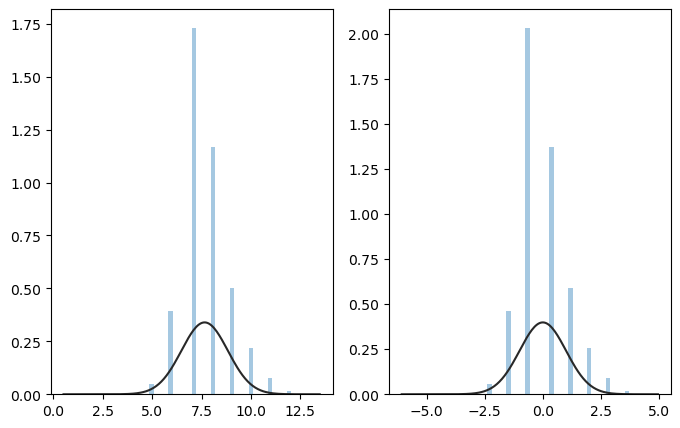

In [378]:
import scipy as sp
import scipy.stats
import seaborn as sns

# 각 값들의 정규 분포 모양 비교비교 
f,ax = plt.subplots(1,2,figsize=(8,5))

# 표준화 전 정규분포 
x0 = df['grade'].dropna().values
sns.distplot(x0, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #커널 밀도 함수, 러그밀도함수 는 안보이고(False) / 정규분포만 보이게(Fit)

# 표준화 이후 정규 분포 
x1 = df_scaled['grade'].values
sns.distplot(x1, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) 
plt.show()

In [379]:
# check Z score 
df_Zscore = pd.DataFrame()
outlier_dict = {}
outlier_idx_list = []

for one_col in df_scaled.columns:
    print("Check",one_col)
    df_Zscore[f'{one_col}_Zscore'] = sp.stats.zscore(df_scaled[one_col])
    outlier_dict[one_col] = df_Zscore[f'{one_col}_Zscore'][(df_Zscore[f'{one_col}_Zscore']>2)|(df_Zscore[f'{one_col}_Zscore']<-2)]
    outlier_idx_list.append(list(outlier_dict[one_col].index))
    if len(outlier_dict[one_col]):
        print(one_col,'Has outliers\n', outlier_dict[one_col])
    else:
        print(one_col,"Has Not outlier")
    print()


print("Before", df_scaled.shape)
all_outlier_idx = sum(outlier_idx_list,[])
df_scaled = df_scaled.drop(all_outlier_idx)
print("After (drop outlier)", df_scaled.shape)

Check id
id Has Not outlier

Check date
date Has Not outlier

Check bedrooms
bedrooms Has outliers
 154     -2.549182
209      2.826929
232      2.826929
239      2.826929
264     -2.549182
           ...   
21375    2.826929
21443   -2.549182
21519   -2.549182
21522    2.826929
21552   -2.549182
Name: bedrooms_Zscore, Length: 546, dtype: float64

Check bathrooms
bathrooms Has outliers
 5        3.097133
75       2.447905
235      2.447905
270      3.421747
300      3.746361
           ...   
21551    3.097133
21561    2.447905
21576    3.097133
21593    2.123291
21600    2.123291
Name: bathrooms_Zscore, Length: 571, dtype: float64

Check sqft_living
sqft_living Has outliers
 5        3.636791
41       2.330199
70       2.929053
115      2.504411
132      2.036215
           ...   
21576    3.016160
21590    3.081489
21593    2.275757
21599    2.079769
21600    2.602405
Name: sqft_living_Zscore, Length: 881, dtype: float64

Check sqft_lot
sqft_lot Has outliers
 5        2.096185
102   

In [380]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(df)
iris_scaled = scaler.transform(df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df_scaled = pd.DataFrame(data=df_scaled, columns=df.columns)
print('feature들의 최소 값')
print(df_scaled.min())
print('\nfeature들의 최대 값')
print(df_scaled.max())

feature들의 최소 값
id              -1.591901
date            -1.593989
bedrooms        -1.473959
bathrooms       -1.772078
sqft_living     -1.654908
sqft_lot        -0.350920
floors          -0.915427
waterfront      -0.087173
view            -0.305759
condition       -0.629187
grade           -1.409587
sqft_above      -1.580045
sqft_basement   -0.658681
yr_built        -1.974795
yr_renovated    -0.210128
zipcode         -1.438025
lat             -1.998784
long            -1.960614
sqft_living15   -1.993874
sqft_lot15      -0.443805
price           -1.247793
dtype: float64

feature들의 최대 값
id               1.849366
date             1.829415
bedrooms         1.751707
bathrooms        1.798677
sqft_living      1.970886
sqft_lot         1.993117
floors           1.862472
waterfront      -0.087173
view             0.999213
condition        0.907554
grade            1.993418
sqft_above       1.994524
sqft_basement    1.985000
yr_built         1.497813
yr_renovated    -0.210128
zipcode          1

In [381]:
X = df_scaled.loc[:, 'date':'sqft_lot15']
X

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.143244,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
2,1.050966,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
4,0.989044,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849
6,-1.098612,-0.398737,0.175607,-0.397313,-0.200098,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.088628,-0.658681,0.816910,-0.210128,-1.400645,-1.806810,-0.803149,0.366876,-0.217900
8,1.484421,-0.398737,-1.447464,-0.326539,-0.184381,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.891699,0.990795,-0.374672,-0.210128,1.272063,-0.344633,-0.874160,-0.301371,-0.170507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,0.997890,-0.398737,0.500221,-0.838288,-0.333489,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.734708,-0.364939,1.259497,-0.210128,0.711355,0.124476,-1.385432,-0.957946,-0.421317
21609,1.033274,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,1.272063,-0.356180,-1.051685,-0.228419,-0.203946
21610,-1.133996,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,1.234683,0.247888,-0.604321,-1.410253,-0.394141
21611,0.697126,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.952078,-0.184414,1.028910,-0.841221,-0.420511


In [382]:
y = df_scaled['price']
y

0       -0.866717
2       -0.980849
4       -0.081958
6       -0.769746
8       -0.846016
           ...   
21607   -0.177295
21609   -0.381588
21610   -0.375865
21611   -0.381588
21612   -0.585882
Name: price, Length: 12677, dtype: float64

In [383]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [384]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

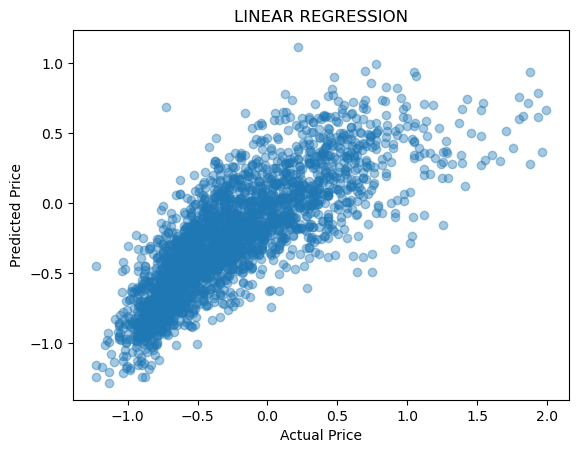

In [385]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("LINEAR REGRESSION")
plt.show()

In [386]:
reg.coef_

array([ 1.99894664e-02, -4.00196612e-02,  5.05093891e-02,  1.13816465e-01,
        3.53624178e-02,  4.68487555e-02, -9.71445147e-17,  2.06388434e-01,
        4.74093187e-02,  2.47112330e-01,  9.59280629e-02,  5.67057120e-02,
       -1.51087977e-01,  6.93889390e-18, -3.91675268e-02,  2.10883816e-01,
       -1.41768202e-03,  6.08750951e-02, -1.11227210e-01])

In [387]:
reg.score(X_train, y_train)

0.6467861537375248

In [388]:
reg.score(X_test, y_test)

0.634373353960777

### 표준화, 이상치 제거, 정규화 과정을 거친 후 값이 낮아진 이유 추측

- 해당 과정이 필요 없는 column들도 모두 포함해서 그렇지 않을까?

In [389]:
df.head() # key 값인 id와 유무를 판단하는 waterfront 제외 후 반복 시도

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,164.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,221.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,299.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,221.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,292.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [400]:
from sklearn.compose import ColumnTransformer # 특성 두개를 제외해야하므로 ColumnTransformer 사용

col_names = ['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view', 'condition',
             'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
             'sqft_lot15', 'price']
features = df[col_names]

ct = ColumnTransformer([
        ('scaling', StandardScaler(), ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'view', 
                                        'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                                        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price'])], remainder='passthrough')

df_scaled = pd.DataFrame(data=ct.fit_transform(features), columns=df.columns)
df_scaled

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,-0.143244,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.305759,-0.629187,-0.558836,-0.734708,...,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715,-0.866717,7.129301e+09,0.0
1,0.360978,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.305759,-0.629187,-0.558836,0.460841,...,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868,-0.005688,6.414100e+09,0.0
2,1.050966,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.305759,-0.629187,-1.409587,-1.229834,...,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375,-0.980849,5.631500e+09,0.0
3,0.360978,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.305759,2.444294,-0.558836,-0.891699,...,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522,0.174090,2.487201e+09,0.0
4,0.989044,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.305759,-0.629187,0.291916,-0.130895,...,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849,-0.081958,1.954401e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-1.425915,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.305759,-0.629187,0.291916,-0.312039,...,1.293542,-0.210128,0.468382,1.004958,-0.938069,-0.666135,-0.412381,-0.490545,2.630000e+08,0.0
21609,1.033274,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.305759,-0.629187,0.291916,0.629908,...,1.463768,-0.210128,1.272063,-0.356180,-1.051685,-0.228419,-0.203946,-0.381588,6.600060e+09,0.0
21610,-1.133996,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.305759,-0.629187,-0.558836,-0.927928,...,1.293542,-0.210128,1.234683,0.247888,-0.604321,-1.410253,-0.394141,-0.375865,1.523300e+09,0.0
21611,0.697126,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.305759,-0.629187,0.291916,-0.227505,...,1.123316,-0.210128,-0.952078,-0.184414,1.028910,-0.841221,-0.420511,-0.381588,2.913101e+08,0.0
